# HW04: Problem 3: Feature Selection

## Description

In this problem we will work with the diabetes dataset from sklearn. This data set is for a regression problem where 10 features are used to predict the progression of diabetes. The dataset is described in more detail [here](https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset). You task here is to use multiple techniques of feature selection to try to interpret the strength of the features in the dataset. You will need to use the following techniques:

- Pearson correlation coefficient using r_regression from sklearn (univariate feature selection)
- Mutual information using mutual_info_regression from sklearn (univariate feature selection)
- Random forest feature importance using RandomForestRegressor from sklearn (multivariate feature selection)
- Recursive feature elimination using sklearn.feature.selection.RFE with a Support Vector Regressor SVR (multivariate feature selection)

For each method you will need to plot the feature importance as a bar graph. The importance goes by different names in different algorithms. For example, in r_regression it is just the output (r value) and the mutual information in mutual_info_regression. In random variable it is called feature_importance_ and in RFE it is the ranking_. The bar graph will be sorted from most important features to least important features, with the y value being the importance of that feature, and the x value being the rank but labeled with the feature name.
You will also need to print out the top 5 features for each method. You will need to use the following code to load the data and split it into training and testing sets. You will need to use the training set for all of the feature selection methods.

* Are there 3 features that are selected in the top 5 by all 4 methods?
* If so, what are they?
* If not, what are the 3 features that are selected by the most methods?
* How would it be possible that univariate methods might select different features than multivariate methods?
* How does dependence between features affect the feature selection methods?

For good habits, make sure you split your code into training and testing. You may not even use the testing data but when you do any analysis such as feature selection, remember you must not use the testing data. You should also make sure you use the same random seed for all of your feature selection methods so that you can compare the results.

## Hints: In sorting features you use "arg" sort. This will return the indices of the sorted array. You can use these indices to sort the feature names.

This kind of code will be useful for plotting the bar graph:

```python
r_inds = np.argsort(np.abs(r_importance))[::-1]
fig, ax = plt.subplots()
rank = np.arange(len(data.feature_names))
ax.bar(rank, r_importance[r_inds])
ax.set_xticks(rank)
ax.set_xticklabels(np.array(data.feature_names)[r_inds])
```

In [6]:
# Some imports you will need
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from numpy import corrcoef
import seaborn as sns
from sklearn.feature_selection import r_regression
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

## Loading and preparing the data

In [7]:
# Load the diabetes data set as X, y
X, y = load_diabetes(return_X_y=True)
# Load the diabetes data set as data to read the description
data = load_diabetes()

# Convert the data to a pandas DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)

# Print the first few rows of the DataFrame
print(df.head())

        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  
0 -0.002592  0.019907 -0.017646  
1 -0.039493 -0.068332 -0.092204  
2 -0.002592  0.002861 -0.025930  
3  0.034309  0.022688 -0.009362  
4 -0.002592 -0.031988 -0.046641  


In [8]:
# Print out the DESCR attribute to inpect the variables
print(data.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [9]:
# Print the array of feature names
print(data.feature_names)

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [10]:
# Split the Data into train/testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [11]:
# Check the shapes
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(309, 10) (309,) (133, 10) (133,)


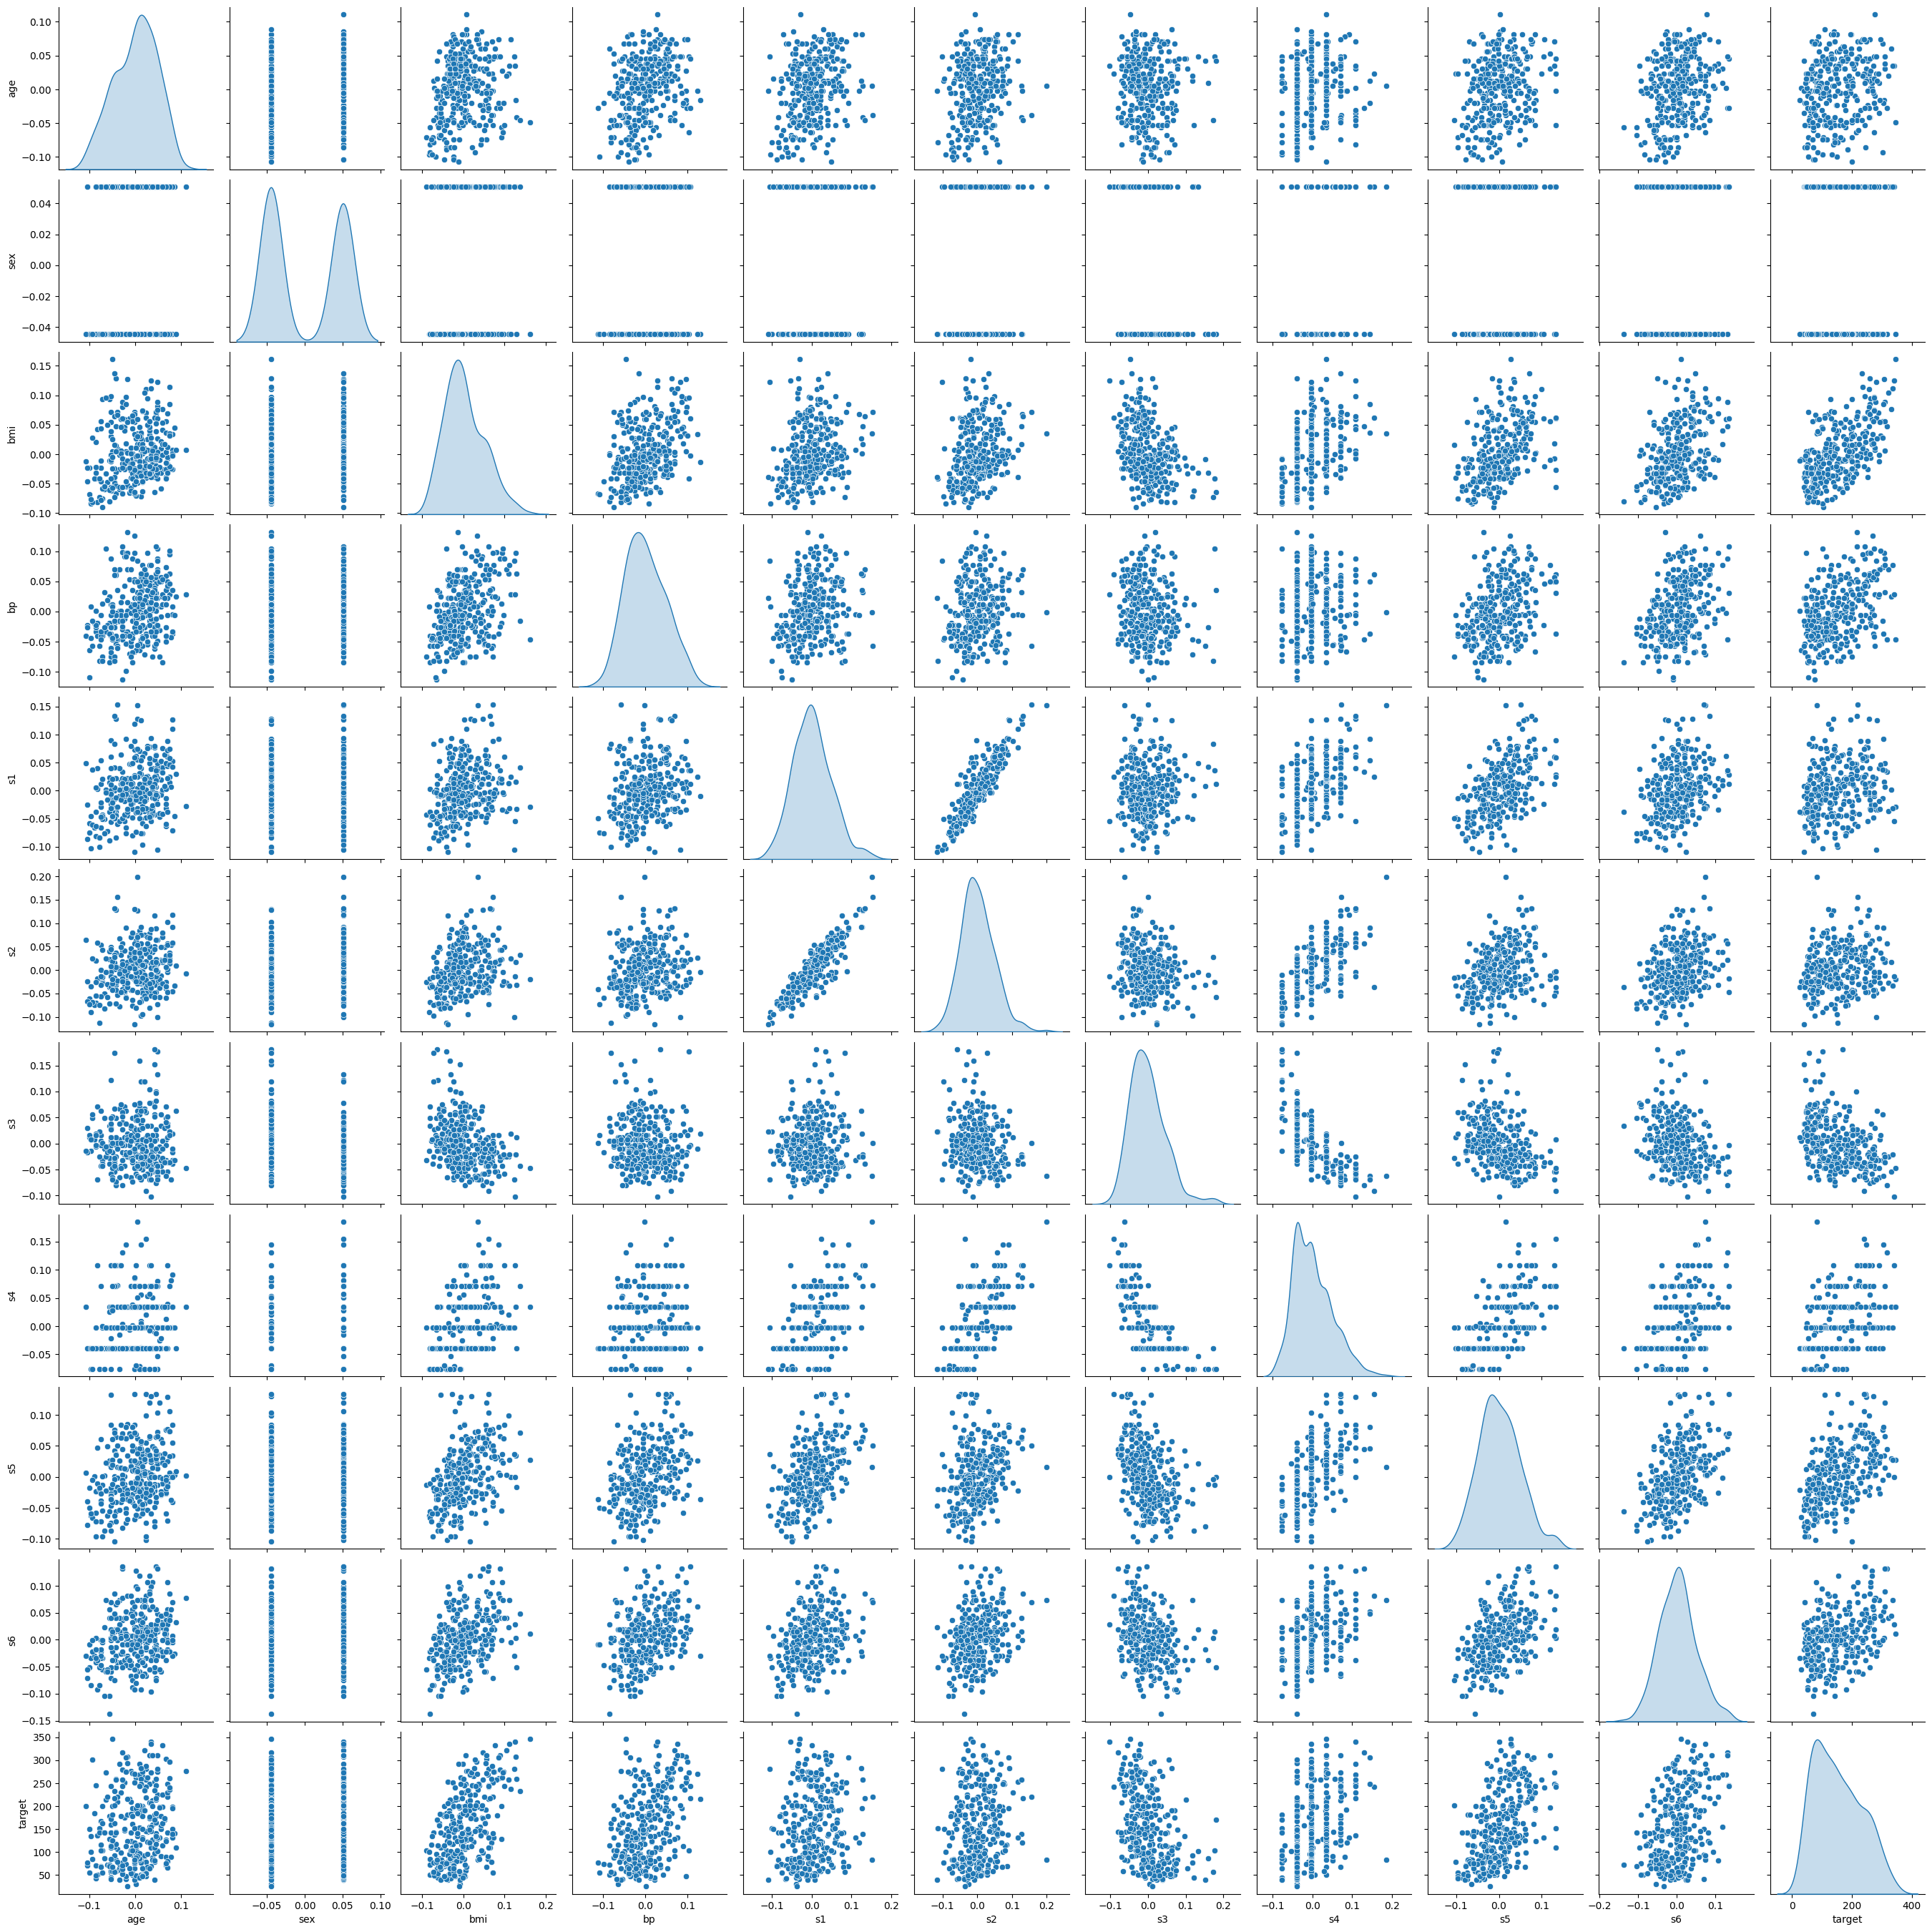

In [12]:
# Concatenate X_train and y_train to create a DataFrame for pair plotting
train_data = pd.DataFrame(X_train, columns=data.feature_names)
train_data['target'] = y_train

# Do a pair plot
sns.pairplot(train_data, diag_kind='kde')
plt.show()

Q: What does the EDA tell you about the data?

A Here: the relationship between the target and the features does not show any unique correlation; however, some features such as BMI, s6, and s5 try to show some patterns, even though the points in scatter plots are spread.

## Univariate feature selection with r_regression

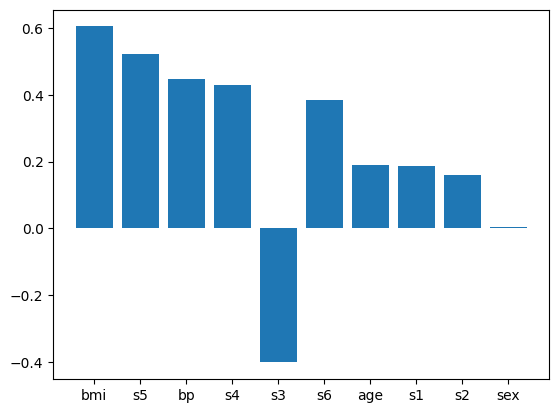

In [13]:
# Use r_regression to get the feature importance, sort by the absolute value
# but show the signed value on y and label on x by variable name
# Should be a bar graph

# Compute feature importance using r_regression
r_importance = r_regression(X_train, y_train)

# Create figure and axis objects
fig, ax = plt.subplots()
# Get the sorted indices of features based on their absolute importance scores
r_inds = np.argsort(np.abs(r_importance))[::-1]
# Create a range of ranks for the features
rank = np.arange(len(data.feature_names))
# Plot the bar graph
ax.bar(rank, r_importance[r_inds])
# Set the x-ticks and x-tick labels using the sorted feature names
ax.set_xticks(rank)
ax.set_xticklabels(np.array(data.feature_names)[r_inds])

# Show the plot
plt.show()

In [14]:
# print the top 5 features according to r_regression?

sorted_features = np.array(data.feature_names)[r_inds]

print("Top 5 features according to r_regression:")
for i in range(5):
    feature = sorted_features[i]
    coefficient = r_importance[r_inds[i]]
    print(f"{feature}: {coefficient}")


Top 5 features according to r_regression:
bmi: 0.6047851850383619
s5: 0.5228817079267034
bp: 0.44675880361694204
s4: 0.42992811367762346
s3: -0.40214085323865123


## Univariate feature selection with mutual information using mutual_info_regression

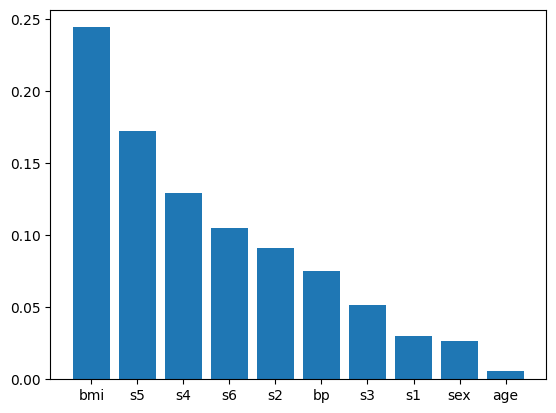

In [15]:
# Use mutual_info_regression to get the feature importance, sort by the absolute value
# but show the signed value on y and label on x by variable name
# Should be a bar graph

# Compute feature importance using mutual_info_regression
MI_importance = mutual_info_regression(X_train, y_train, random_state=42)

# Create figure and axis objects
fig, ax = plt.subplots()
# Get the sorted indices of features based on their absolute importance scores
MI_inds = np.argsort(np.abs(MI_importance))[::-1]
# Create a range of ranks for the features
rank = np.arange(len(data.feature_names))
# Plot the bar graph
ax.bar(rank, MI_importance[MI_inds])
# Set the x-ticks and x-tick labels using the sorted feature names
ax.set_xticks(rank)
ax.set_xticklabels(np.array(data.feature_names)[MI_inds])

# Show the plot
plt.show()



In [16]:
# What are the top 5 features according to mutual_info_regression?
MI_sorted_features = np.array(data.feature_names)[MI_inds]

print("Top 5 features according to r_regression:")
for i in range(5):
    feature = MI_sorted_features[i]
    coefficient = MI_importance[MI_inds[i]]
    print(f"{feature}: {coefficient}")


Top 5 features according to r_regression:
bmi: 0.24431302954376255
s5: 0.17207046320739883
s4: 0.1291507300323005
s6: 0.10516345326190013
s2: 0.09077348411069286


## Multivariate feature selection with Random Forest feature_importance_

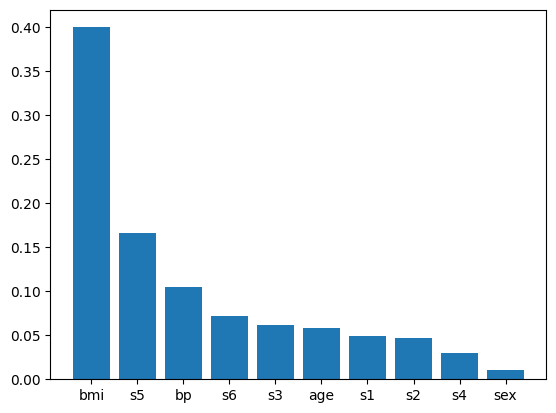

10 [2 8 3 9 6 0 4 5 7 1]


In [17]:
# Use random forest feature_importance_ to get the feature importance, sort by the absolute value
# but show the signed value on y and label on x by variable name
# Should be a bar graph

# Compute feature importance using RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

RF_importance = rf_model.feature_importances_
# Create figure and axis objects
fig, ax = plt.subplots()
# Get the sorted indices of features based on their absolute importance scores
RF_inds = np.argsort(np.abs(RF_importance))[::-1]
# Create a range of ranks for the features
rank = np.arange(len(data.feature_names))
# Plot the bar graph
ax.bar(rank, RF_importance[RF_inds])
# Set the x-ticks and x-tick labels using the sorted feature names
ax.set_xticks(rank)
ax.set_xticklabels(np.array(data.feature_names)[RF_inds])

# Show the plot
plt.show()
print(len(RF_inds), RF_inds)

In [18]:
# What are the top 5 features according to random forest feature_importance_?
RF_sorted_features = np.array(data.feature_names)[RF_inds]

print("Top 5 features according to r_regression:")
for i in range(5):
    feature = RF_sorted_features[i]
    coefficient = RF_importance[RF_inds[i]]
    print(f"{feature}: {coefficient}")

Top 5 features according to r_regression:
bmi: 0.4000000330065279
s5: 0.16660162829051547
bp: 0.104839480536661
s6: 0.07135770592912359
s3: 0.0617297986181862


## Multivariate feature selection with recursive feature elimination (RFE) using a support vector regressor

[0 1 2 3 4 5 6 7 8 9] [1 5 4 0 9 7 6 3 8 2] [ 1.79447399 -0.95321755  6.4453162   5.14709664  1.35531357  0.99816072
 -4.77692505  4.59566559  5.8595367   4.10482795] ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


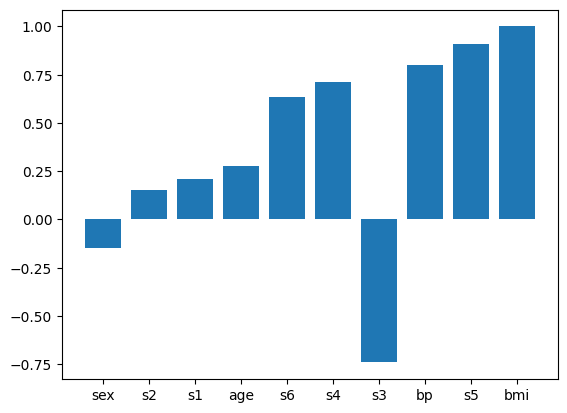

In [19]:
# Use recursive feature elimination (RFE) with a support vector regressor
# to get the feature importance, sort by the absolute value
# but show the signed value on y and label on x by variable name
# Should be a bar graph

# Create an instance of SVR model
svr_model = SVR(kernel='linear')

# Create an instance of RFE with SVR model and specify the number of features to select
rfe = RFE(estimator=svr_model, n_features_to_select=10, step=1)

# Fit RFE to the training data
rfe.fit(X_train, y_train)

# Get the feature rankings from RFE
RFE_SV_importance = rfe.estimator_.coef_

# Normalize the coefficients
normalized_coefficients = RFE_SV_importance / np.max(np.abs(RFE_SV_importance))

# Get the sorted indices of features based on their absolute importance scores
RFE_SV_inds = np.argsort(np.abs(RFE_SV_importance))[::-1]

# Create figure and axis objects
fig, ax = plt.subplots()
# Create a range of ranks for the features
rank = np.arange(len(data.feature_names))
# Plot the bar graph
ax.bar(rank, normalized_coefficients[0, RFE_SV_inds[0,:]])
# Set the x-ticks and x-tick labels using the sorted feature names
ax.set_xticks(rank)
ax.set_xticklabels(np.array(data.feature_names)[RFE_SV_inds[0,:]])

# Show the plot
print(rank, RFE_SV_inds[0,:],RFE_SV_importance [0,:], data.feature_names )
plt.show()

In [20]:
# What are the top 5 features according to RFE with SVR?

RFE_SV_sorted_features = np.array(data.feature_names)[RFE_SV_inds[0,:]]

print("Top 5 features according to r_regression:")
for i in range(1,6):
    feature = RFE_SV_sorted_features[-i]
    coefficient = RF_importance[RFE_SV_inds[0,-i]]
    print(f"{feature}: {coefficient}")

Top 5 features according to r_regression:
bmi: 0.4000000330065279
s5: 0.16660162829051547
bp: 0.104839480536661
s3: 0.0617297986181862
s4: 0.029426653203928912


## Conclusions

Q1: Are there 3 features that are selected in the top 5 by all 4 methods?

A1: Your answer here

Q2: If so, what are they? / If not, what are the 3 features that are selected by the most methods?

A2: BMI, S5, S6, in some cases BP are selected in most of the methods

Q3: How would it be possible that univariate methods might select different features than multivariate methods?

A3: univariate feature selection evaluate each feature individual with a  statistical test, such as chi-square, ANOVA F-test, mutual information, or correlation coefficient. For multivariate feature selection is evaluated the set of features with the target simultaneusly, this model can capture complex relationships because use predicted models.

Q4: How does dependence between features affect the feature selection methods?

Q4:  dependence between features can affect feature selection methods by introducing redundancy, instability, collinearity, and overfitting. Multivariate feature selection methods are often more robust and effective in handling dependence between features.

Redundancy:If two or more features are highly correlated or redundant, feature selection methods may struggle to differentiate between them.

Instability:With highly correlated features, small changes in the data or model parameters can lead to large variations in the selected features, univariate feature is more sensitive.

Collinearity: When features are linearly dependent on each other,Univariate feature selection methods may struggle to select features in the presence of collinearity, multivariate feature selection methods can address collinearity by regularizing the model.

Overfitting:With dependent features, models may overfit by capturing noise or irrelevant patterns present in the data. It happens with Univariate feature selection model.